# Proyek Analisis Data: E-commerece Public Dataset
- **Nama:** Sharon Tabita Sulung
- **Email:** m309d4kx1726@bangkit.academy
- **ID Dicoding:** M309D4KX1726

## Business Questions

1. Does the cost of shipping goods affect the amount of sales in 2018?
2. Which products are the top 10 best sellers in sales ?

Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import streamlit as st
import os

## Data Wrangling

1. Gathering Data

In [3]:
# reading dataset
product_df = pd.read_csv ('data/products_dataset.csv')
order_df = pd.read_csv ('data/order_items_dataset.csv')


In [4]:
# merge two datasets
df_products_order = pd.merge(
    left=product_df,
    right=order_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)


In [5]:
# Simpan hasil penggabungan ke dalam file CSV
df_products_order.to_csv('df_merged.csv', index=False)

In [6]:
# displays the top 5 datasets
df_products_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  112650 non-null  object 
 1   product_category_name       111047 non-null  object 
 2   product_name_lenght         111047 non-null  float64
 3   product_description_lenght  111047 non-null  float64
 4   product_photos_qty          111047 non-null  float64
 5   product_weight_g            112632 non-null  float64
 6   product_length_cm           112632 non-null  float64
 7   product_height_cm           112632 non-null  float64
 8   product_width_cm            112632 non-null  float64
 9   order_id                    112650 non-null  object 
 10  order_item_id               112650 non-null  int64  
 11  seller_id                   112650 non-null  object 
 12  shipping_limit_date         112650 non-null  object 
 13  price         

In [7]:
# displays the top 5 datasets
df_products_order.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


2. Assessing Data

In [8]:
# Checking if there is any duplication in the data
df_products_order.duplicated().sum()

0

from the results above there is no duplicate data found

In [9]:
# Check if there are missing values in the data
df_products_order.isnull().sum()

product_id                       0
product_category_name         1603
product_name_lenght           1603
product_description_lenght    1603
product_photos_qty            1603
product_weight_g                18
product_length_cm               18
product_height_cm               18
product_width_cm                18
order_id                         0
order_item_id                    0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64

3. Cleaning Data

In [10]:
# delete missing value
df_products_order.dropna(axis=0, inplace=True)

In [11]:
datetime_columns = ['shipping_limit_date']
 
for column in datetime_columns:
  df_products_order[column] = pd.to_datetime(df_products_order[column])

In [12]:
df_products_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111046 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   product_id                  111046 non-null  object        
 1   product_category_name       111046 non-null  object        
 2   product_name_lenght         111046 non-null  float64       
 3   product_description_lenght  111046 non-null  float64       
 4   product_photos_qty          111046 non-null  float64       
 5   product_weight_g            111046 non-null  float64       
 6   product_length_cm           111046 non-null  float64       
 7   product_height_cm           111046 non-null  float64       
 8   product_width_cm            111046 non-null  float64       
 9   order_id                    111046 non-null  object        
 10  order_item_id               111046 non-null  int64         
 11  seller_id                   111046 non-

## Exploratory Data Analysis (EDA)

- Will be displayed from 2016 - 2020 the most sales of goods in each month

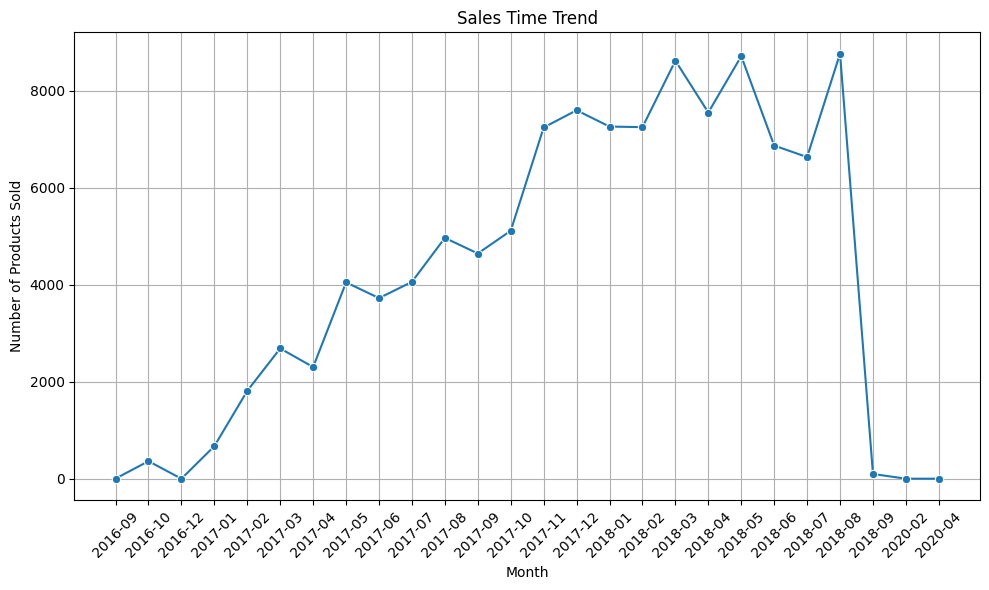

In [14]:
# Create a new column to extract the year and month from the delivery date
df_products_order['year_month'] = df_products_order['shipping_limit_date'].dt.to_period('M')

# Calculate the number of products sold per month
monthly_sales = df_products_order.groupby('year_month').size()


# Sales time trend plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o')
plt.title('Sales Time Trend')
plt.xlabel('Month')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

From the visualization results can be seen in March, April, and August in 2018 is the time with the highest sales while the drastic decline in sales occurred from the end of August to September.

- Next, we will visualize the 5 best-selling products in 2017 - 2018.

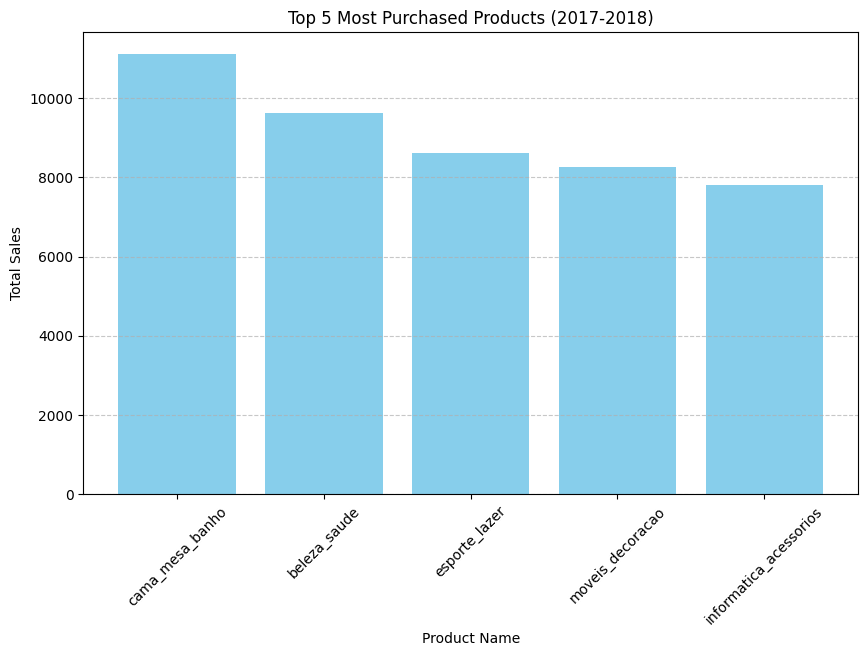

In [15]:
# Filter data for 2017-2018 only
df_terakhir = df_products_order[(df_products_order['shipping_limit_date'].dt.year >= 2017) & (df_products_order['shipping_limit_date'].dt.year <= 2018)]

# Calculate the total sales of each item
penjualan_barang = df_terakhir['product_category_name'].value_counts().reset_index()
penjualan_barang.columns = ['product_category_name', 'total_penjualan']

# Take the 5 most frequently purchased items
top_5_barang = penjualan_barang.head()

# Visualize your 5 most frequently purchased items
plt.figure(figsize=(10, 6))
plt.bar(top_5_barang['product_category_name'], top_5_barang['total_penjualan'], color='skyblue')
plt.title('Top 5 Most Purchased Products (2017-2018)')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the visualization results above there are best 5 products sold in 2017 - 2018:
1. cama_mesa_banho
2. beleza_saude
3. esporte_lazer
4. moveis_decoracao
5. informatica_acessorios

- Analyzed the distribution of customers based on the 5 cities they live in 

# Visualization & Explanatory Analysis

1. Does the cost of shipping goods affect the amount of sales in 2018?

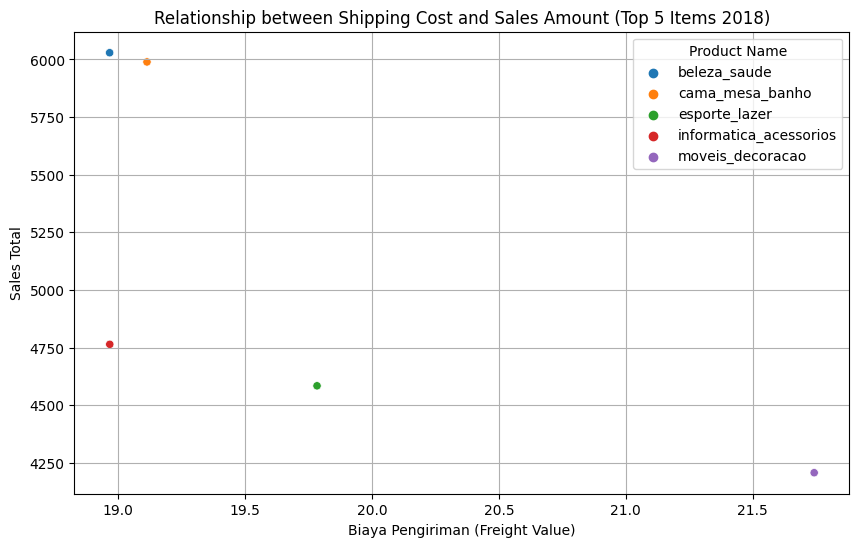

In [17]:
# Filter data for 2018 only
df_2018 =df_products_order[df_products_order['shipping_limit_date'].dt.year == 2018]

# Calculate total sales for each item
top_5_barang = df_2018['product_category_name'].value_counts().head().index.tolist()
df_top_5 = df_2018[df_2018['product_category_name'].isin(top_5_barang)]
penjualan_per_barang = df_top_5.groupby('product_category_name')['order_item_id'].count().reset_index()
penjualan_per_barang.columns = ['product_category_name', 'total_penjualan']

# Calculate the average shipping cost for each item
biaya_pengiriman_per_barang = df_top_5.groupby('product_category_name')['freight_value'].mean().reset_index()

# Merge both data
data_combined = pd.merge(penjualan_per_barang, biaya_pengiriman_per_barang, on='product_category_name')

# Visualize the relationship between shipping cost and sales amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_combined, x='freight_value', y='total_penjualan', hue='product_category_name')
plt.title('Relationship between Shipping Cost and Sales Amount (Top 5 Items 2018)')
plt.xlabel('Biaya Pengiriman (Freight Value)')
plt.ylabel('Sales Total')
plt.grid(True)
plt.legend(title='Product Name')
plt.show()

Top 5 best-selling products in 2018:
1. beleza_saude
2. cama_meza_banho
3. esporte_lazer
4. informatica_accessorios
5. movies_decoracao

2. Which products are the top 10 best sellers in sales ?

Text(0.5, 0, 'Number of Orders')

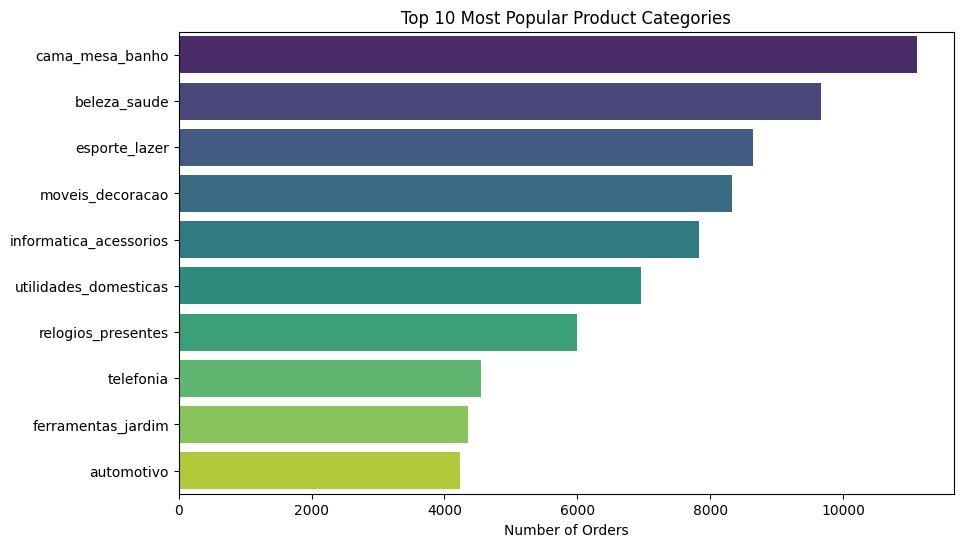

In [18]:
#Calculate the frequency of each product category
category_counts =df_products_order['product_category_name'].value_counts().head(10) 

# Visualize product category frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Top 10 Most Popular Product Categories')
plt.xlabel('Number of Orders')

# Conclusions

1. Does the cost of shipping goods affect the amount of sales in 2018?

    From the visualization results it can be seen that the lower the shipping costs, the higher the goods sold, as for the items with the highest total sales with low shipping costs are beleza_saude

2. Which products are the top 10 best sellers in sales ?

    From the visualization results above, it can be concluded that mapping the 10 highest selling products is one solution to see consumer interest in products so that companies pay attention to producing products with the highest sales, besides that it is a consideration in the future to produce these goods.